### SALES PREDICTION USING PYTHON
- Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.
- In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let's embark on the journey of sales prediction using machine learning in Python.

##### Dataset - https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/input

#### Summary
- Checked data for cleanliness, correlations, and top-selling products based on advertising mediums.
- Created 13 regression models (including Random Forest, SVM, Gradient Boosting) with a focus on robust performance.
- Identified Random Forest as the optimal model due to its balanced accuracy and generalization.
- Confirmed Random Forest's superiority through cross-validation.
- Saved the Random Forest model for deployment and generated an output file with accurate sales predictions.

### Steps
#### Preparing the environment
1. Importing the necessary packages and modules
2. Reading the required files in a Data Frame
    - From the dataset we can see that the datset is about the amount spent in various advertising mediums and the sales for each product.
#### Data Preprocessing
3. Checking for missing values in the dataset - There are no missing values in our dataset
4. Checking for duplicate values in our dataset - There are no duplicate rows in our dataset
5. There are no categorical variables to encode
6. Spliting data into train and test
#### Exploratory Data Analysis
7. After visualising the dataset in many different forms, we can deduce the below
    - We can clearly see that products with increased TV ads, have increased sales.
    - While we have a mixed output in th eother categories.
    - We see a small amount of outliers in the Newspapers category, while the other categories have no outliers.
    - We can build models with and without outliers to check which is better.
    - We see that the Sales is highly correlated with TV and the the relation seems to be little less with the other categories.
    - The products with top TV ads are products in indices 101, 42, 30, 98, 183, 188, 169, 17 and 150
    - The products with top Radio ads are products in indices 37, 55, 147, 128, 175, 5, 15, 135, 105 and 53
    - The products with top Newspaper ads are products in indices 101, 75, 141, 5, 88, 93, 183, 2, 0 and 12
    - The products with top Newspaper ads are products in indices 175, 183, 98, 147, 36, 128, 17, 61, 101 and 55
    - From the bar graphs we can confirm that the sales increase with increse in TV ads and the other categories have a mixed output.
    - From the other two graphs comparing sales we see that 6 products with highest total ads are in the top 10 highest selling products.
    - We can also observe that 5 products with highest TV ads are in the top 10 highest selling products.
    - We can see while only 4 products with highest radio are top seeling, 2 of them are unique to Radios, meaning they are not in highest TV or Total ads.
    - We see only 2 products from highest Newspaper category having top sales, this maybe because of the other category ads also.
8. Spliting the data into dependent and independent
#### Model Building
9. Building various models on the raw data, we come to the below conclusions
    - Random Forest and Support Vector Model with a linear kernel exhibit robust performance on both training and testing datasets, balancing accuracy and generalization.
    - While complex models like Gradient Boosting show high accuracy on training data, they may suffer from overfitting on the testing set, emphasizing the need for careful model selection.
    - Ensemble methods, such as Random Forest, prove effective in mitigating overfitting observed in individual decision trees, providing improved generalization.
    - The characteristics of the dataset, including the nature of relationships and noise, influence model performance. Simple models like Linear Regression and SVM with a linear kernel excel when dealing with linear relationships.
    - LightGBM and XGBoost, gradient boosting implementations, demonstrate competitive accuracy with faster training times, making them efficient choices for large datasets.
    - In conclusion, the choice of the regression model depends on the specific characteristics of the dataset, the trade-offs between bias and variance, and considerations for overfitting. Random Forest, SVM with a linear kernel, and ensemble methods like LightGBM and XGBoost emerge as strong contenders, each with its own set of advantages depending on the use case.
10. Deciding no more model building required
    - Since there a only outliers in Newspaper category and they have less corelation with target, no treatment required.
    - From the early visualisations we know that the data is in the same scale
    - So deducing that no furthur model building required
#### Cross Validation of Top 3 Models
11. Applying croos validation technique on Random Forest, SVM with Linear Kernel and LightBGM
    - Considering the results, the Random Forest model appears to be the best among the three. 
    - It achieves high mean accuracy on both training and test sets, indicating robust performance and generalization. 
    - While LGBoost shows good performance on the training set, the negative mean accuracy on the test set raises concerns, suggesting potential issues that need further investigation. 
    - SVM with a linear kernel also performs well, but Random Forest stands out with a balanced combination of accuracy and generalization.
#### Saving the model for deployment and genearting the output file
12. After building the output file, the predcited sales values are very similar to the actual sales.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import timeit
import xgboost as xgb

from pandas.plotting import scatter_matrix
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

sns.set()
%matplotlib inline

In [2]:
# Reading the dataset into a data frame

sales_df = pd.read_csv("04_advertising.csv")
sales_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


- From the dataset we can see that the datset is about the amount spent in various advertising mediums and the sales for each product.

#### Data Preprocessing

In [3]:
# Checking for missing values

sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
sales_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
sales_df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

- There are no missing values in our dataset

In [6]:
# Checking for duplicate values

sales_df.duplicated().sum()

0

- There are no duplicate rows in our dataset

In [7]:
# Train test split

train_df, validation_df = train_test_split(sales_df, train_size = 0.75, random_state = 1)
train_df.head(2)

,TV,Radio,Newspaper,Sales
98,289.7,42.3,51.2,25.4
123,123.1,34.6,12.4,15.2


In [8]:
validation_df.head(2)

,TV,Radio,Newspaper,Sales
58,210.8,49.6,37.7,23.8
40,202.5,22.3,31.6,16.6


#### Exploratory Data Analysis

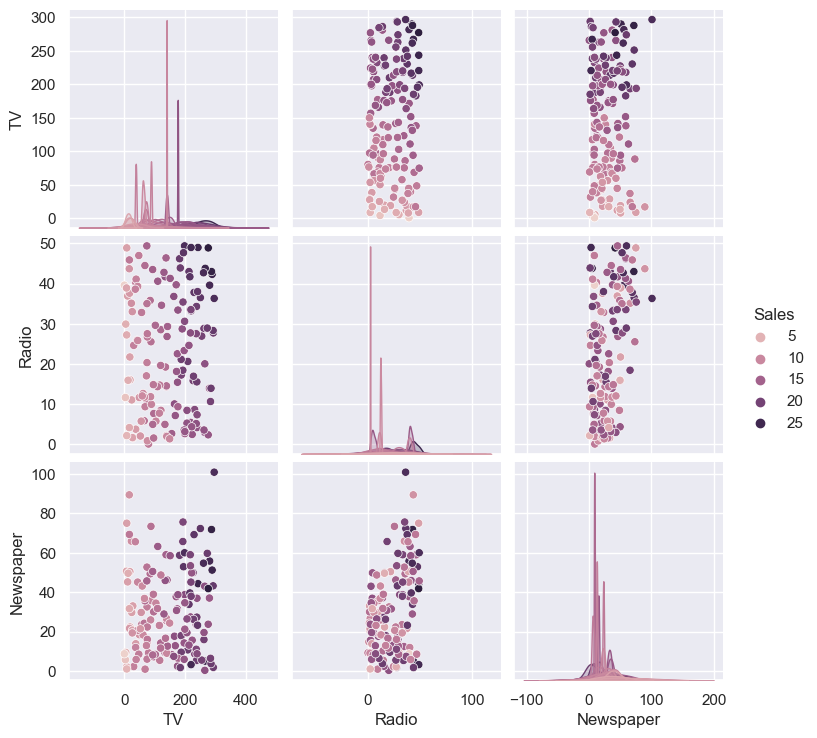

In [9]:
# Checking for the distribution of each variable
# Checking the pairplot

sns.pairplot(train_df, hue = "Sales")
plt.show()

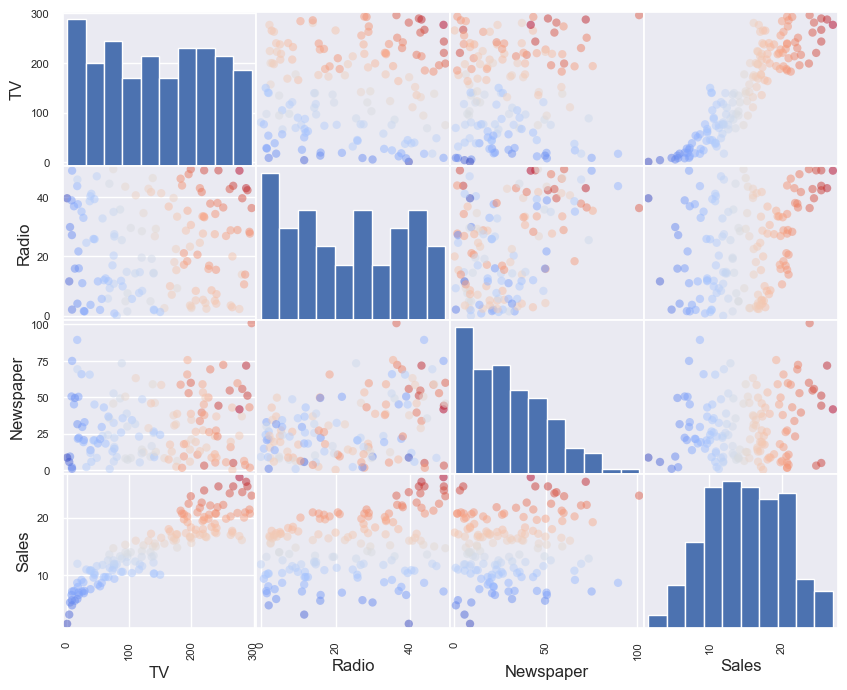

In [10]:
# Using scater-matrix plot

scatter_matrix(train_df, diagonal = "hist", marker = "o", c = train_df['Sales'], cmap = 'coolwarm', figsize = (10,8))
plt.show()

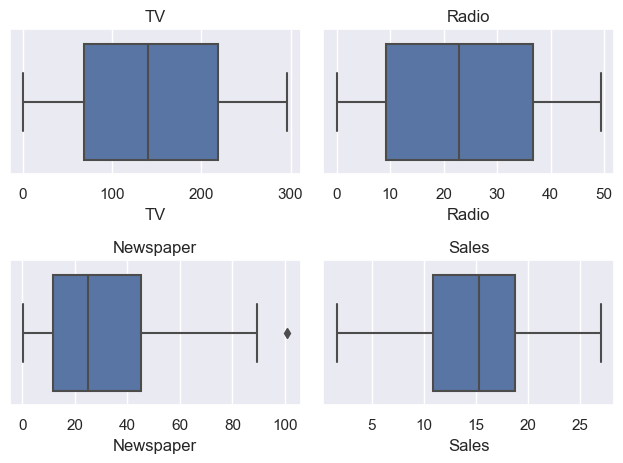

In [11]:
# Using box plot to see the distribution of each feature

plt.figure()

for col in train_df.select_dtypes(include = ['number']).columns:
    plt.subplot(2, 2, train_df.columns.get_loc(col) + 1)  # Adjust the subplot layout as needed
    sns.boxplot(x=train_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

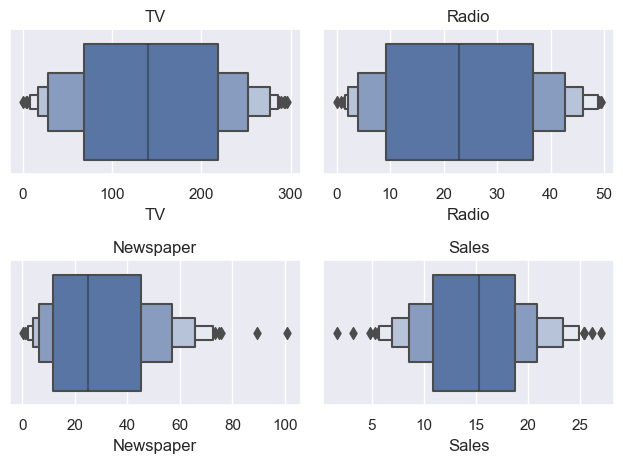

In [12]:
# Using boxenplot to see the distribution of each feature

plt.figure()

for col in train_df.select_dtypes(include = ['number']).columns:
    plt.subplot(2, 2, train_df.columns.get_loc(col) + 1)  # Adjust the subplot layout as needed
    sns.boxenplot(x=train_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

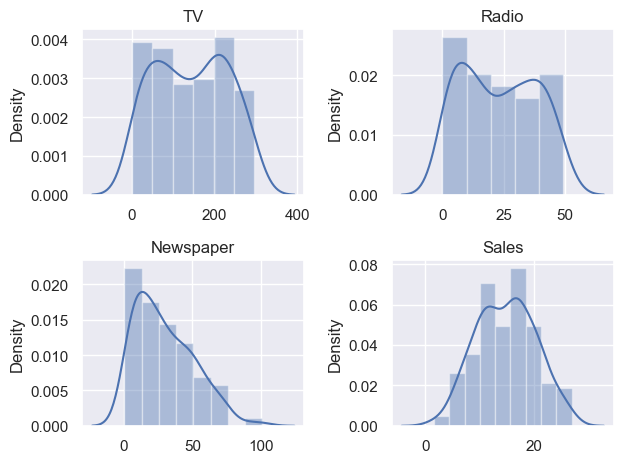

In [13]:
# Using distplot to see the distribution of each feature

plt.figure()

for col in train_df.select_dtypes(include = ['number']).columns:
    plt.subplot(2, 2, train_df.columns.get_loc(col) + 1)  # Adjust the subplot layout as needed
    sns.distplot(x=train_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

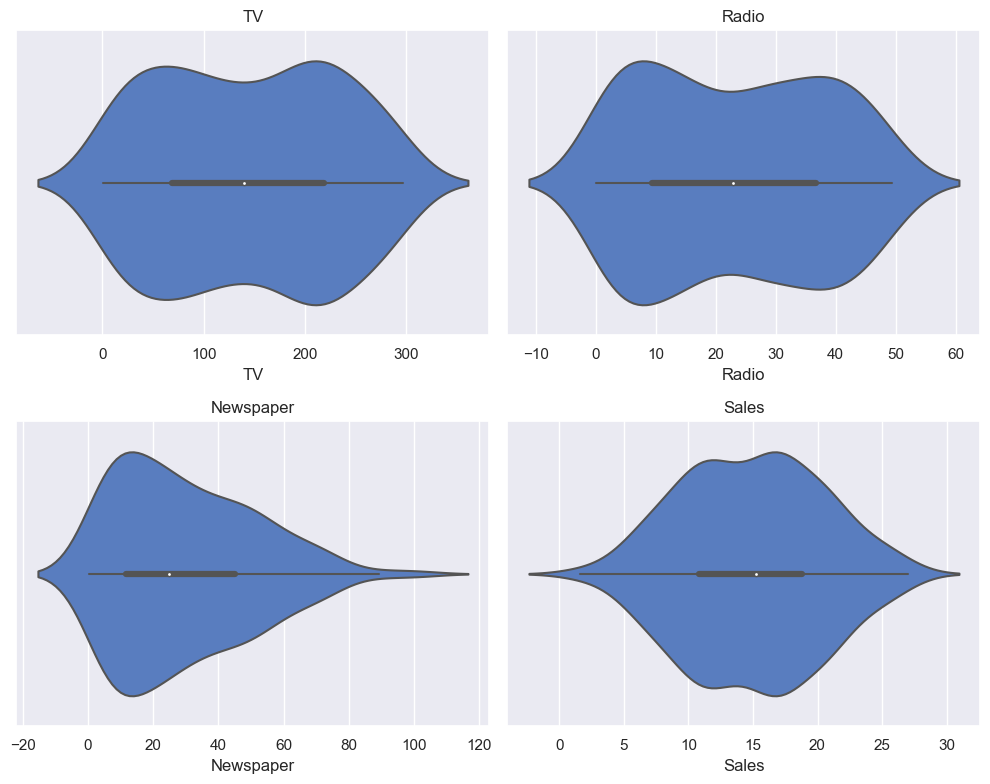

In [14]:
# Using violin plots to see a deper look into the distribution

plt.figure(figsize=(10, 8))

for col in train_df.select_dtypes(include = ['number']).columns:
    plt.subplot(2, 2, train_df.columns.get_loc(col) + 1)  # Adjust the subplot layout as needed
    sns.violinplot(x=train_df[col], palette = 'muted')
    plt.title(col)

plt.tight_layout()
plt.show()

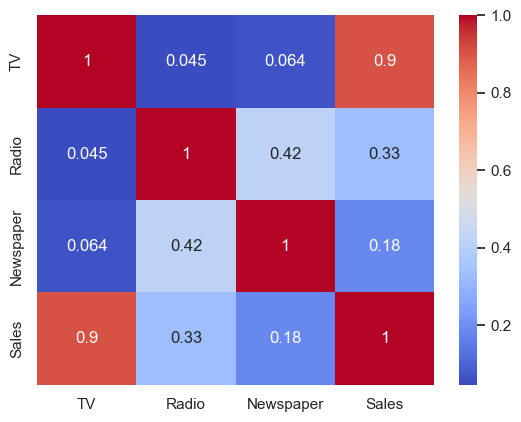

In [15]:
# Using heatmap to see the relationships

sns.heatmap(train_df.corr(), annot = True, cmap = "coolwarm")
plt.show()

In [16]:
# Viz functions 

def top_ten(col):
    train_df[col].sort_values(ascending = False)[:10].plot(kind = "bar")
    plt.title("Top Ten {}s".format(col))
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

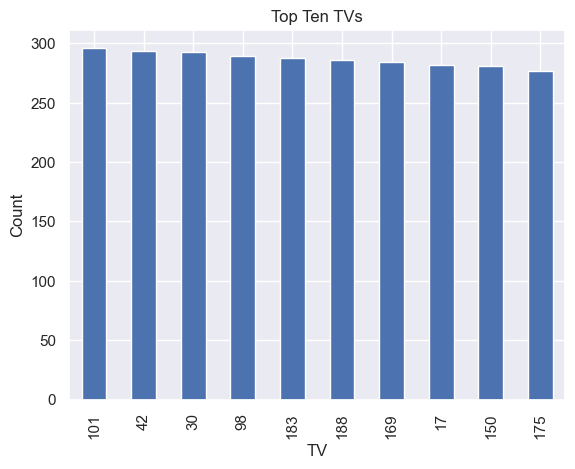

In [17]:
top_ten("TV")

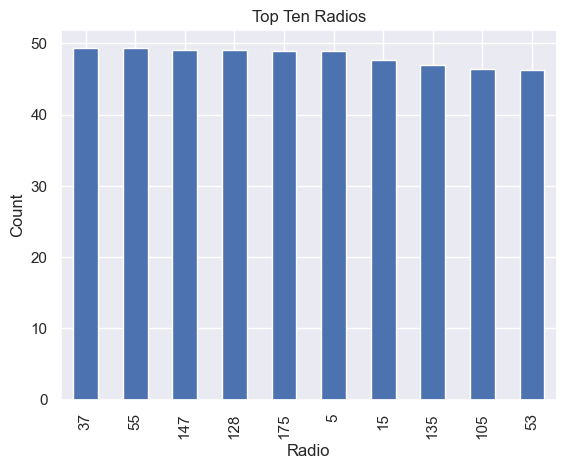

In [18]:
top_ten("Radio")

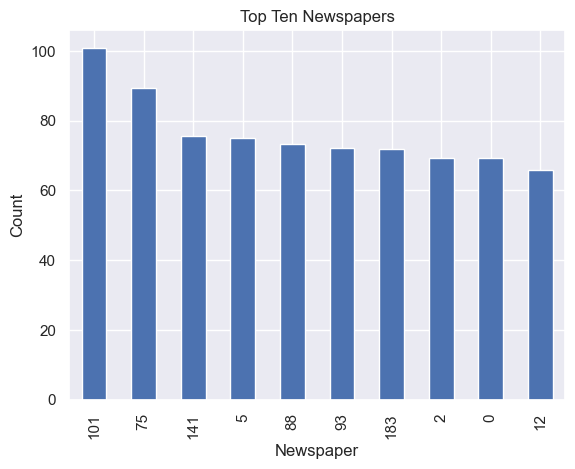

In [19]:
top_ten("Newspaper")

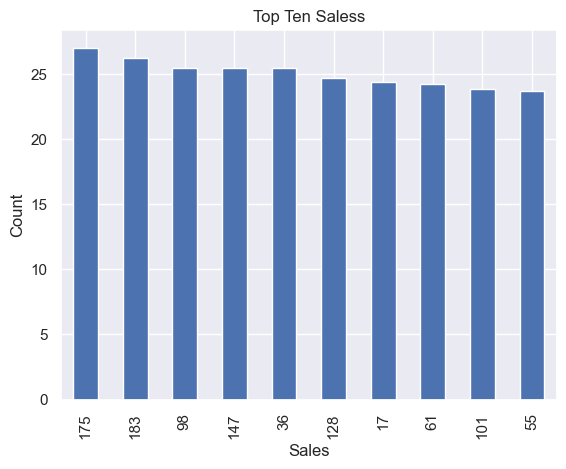

In [20]:
top_ten("Sales")

In [21]:
# Checking each variable against the target variable

def sales_per(col, color):
    avg_sales = train_df.groupby(col)['Sales'].mean().reset_index()
    plt.figure(figsize = (10, 6))
    plt.bar(avg_sales[col], avg_sales['Sales'], color = color)
    plt.title('Sales based on {} ads'.format(col))
    plt.xlabel(col)
    plt.ylabel('Sales')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

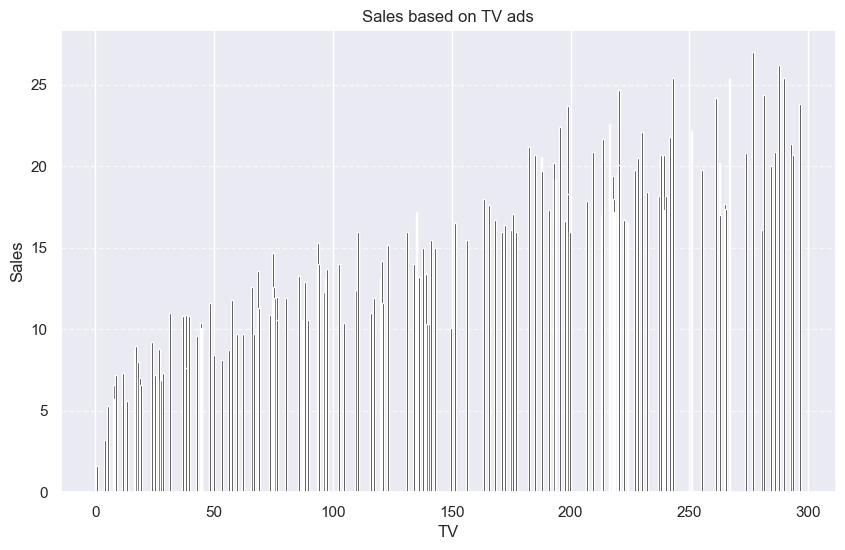

In [22]:
sales_per("TV","black")

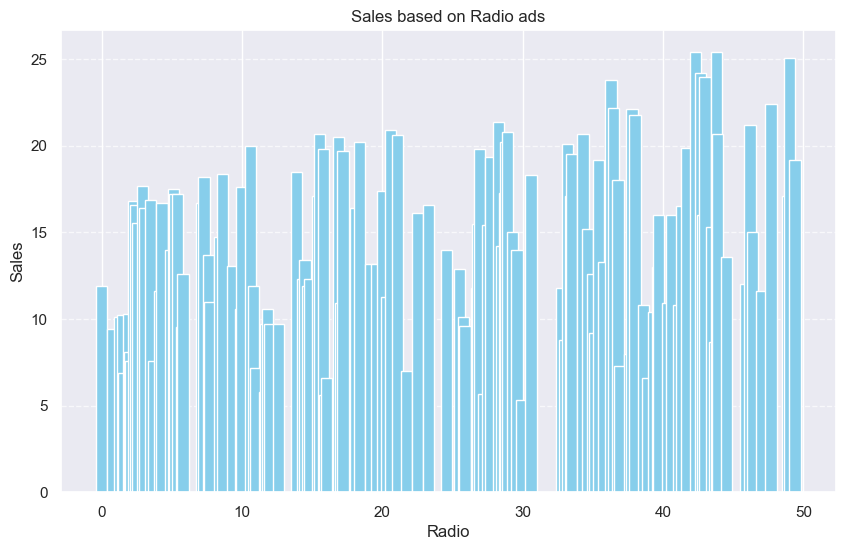

In [23]:
sales_per("Radio","skyblue")

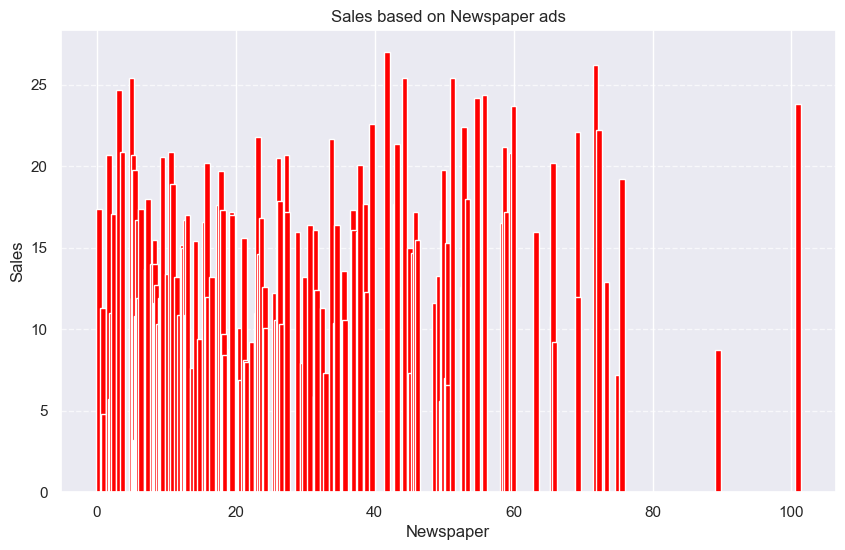

In [24]:
sales_per("Newspaper","red")

In [25]:
# Getting the ad details of top 10 selling products

top_10_products = train_df.nlargest(10, 'Sales')
top_10_products

,TV,Radio,Newspaper,Sales
175,276.9,48.9,41.8,27.0
183,287.6,43.0,71.8,26.2
98,289.7,42.3,51.2,25.4
36,266.9,43.8,5.0,25.4
147,243.2,49.0,44.3,25.4
128,220.3,49.0,3.2,24.7
17,281.4,39.6,55.8,24.4
61,261.3,42.7,54.7,24.2
101,296.4,36.3,100.9,23.8
55,198.9,49.4,60.0,23.7


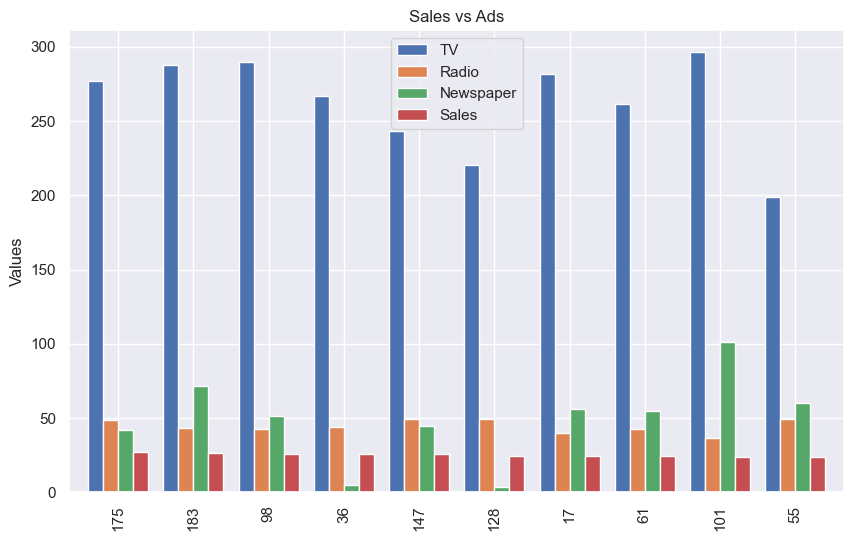

In [26]:
ax = top_10_products.plot(kind='bar', figsize=(10, 6), width=0.8)
ax.set_ylabel('Values')
plt.title('Sales vs Ads')

plt.show()

In [27]:
# Getting the sales details of products with more ads

train_df['Total_Ad_Spent'] = train_df['TV'] + train_df['Radio'] + train_df['Newspaper']
train_df.head(2)

,TV,Radio,Newspaper,Sales,Total_Ad_Spent
98,289.7,42.3,51.2,25.4,383.2
123,123.1,34.6,12.4,15.2,170.1


In [28]:
top_10_ads = train_df.nlargest(10, 'Total_Ad_Spent')
top_10_ads

,TV,Radio,Newspaper,Sales,Total_Ad_Spent
101,296.4,36.3,100.9,23.8,433.6
183,287.6,43.0,71.8,26.2,402.4
98,289.7,42.3,51.2,25.4,383.2
17,281.4,39.6,55.8,24.4,376.8
175,276.9,48.9,41.8,27.0,367.6
30,292.9,28.3,43.2,21.4,364.4
137,273.7,28.9,59.7,20.8,362.3
93,250.9,36.5,72.3,22.2,359.7
61,261.3,42.7,54.7,24.2,358.7
0,230.1,37.8,69.2,22.1,337.1


In [29]:
top_10_ads.drop(['Total_Ad_Spent'], axis = 1, inplace = True)
train_df.drop(['Total_Ad_Spent'], axis = 1, inplace = True)

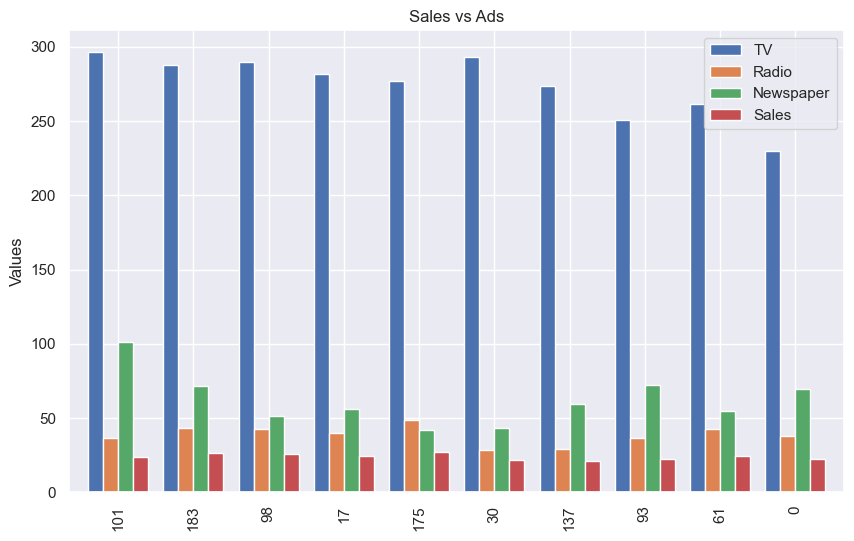

In [30]:
ax = top_10_ads.plot(kind='bar', figsize=(10, 6), width=0.8)
ax.set_ylabel('Values')
plt.title('Sales vs Ads')

plt.show()

#### Deductions from the visuals
- We can clearly see that products with increased TV ads, have increased sales.
- While we have a mixed output in th eother categories.
- We see a small amount of outliers in the Newspapers category, while the other categories have no outliers.
- We can build models with and without outliers to check which is better.
- We see that the Sales is highly correlated with TV and the the relation seems to be little less with the other categories.
- The products with top TV ads are products in indices 101, 42, 30, 98, 183, 188, 169, 17 and 150
- The products with top Radio ads are products in indices 37, 55, 147, 128, 175, 5, 15, 135, 105 and 53
- The products with top Newspaper ads are products in indices 101, 75, 141, 5, 88, 93, 183, 2, 0 and 12
- The products with top Newspaper ads are products in indices 175, 183, 98, 147, 36, 128, 17, 61, 101 and 55
- From the bar graphs we can confirm that the sales increase with increse in TV ads and the other categories have a mixed output.
- From the other two graphs comparing sales we see that 6 products with highest total ads are in the top 10 highest selling products.
- We can also observe that 5 products with highest TV ads are in the top 10 highest selling products.
- We can see while only 4 products with highest radio are top seeling, 2 of them are unique to Radios, meaning they are not in highest TV or Total ads.
- We see only 2 products from highest Newspaper category having top sales, this maybe because of the other category ads also.

#### Model Building

In [31]:
# Splitting dependent and independent variable

raw_x_train = train_df.drop(['Sales'], axis = 1)
raw_y_train = train_df['Sales']

raw_x_val = validation_df.drop(['Sales'], axis = 1)
raw_y_val = validation_df['Sales']

raw_x_train.head(2)

,TV,Radio,Newspaper
98,289.7,42.3,51.2
123,123.1,34.6,12.4


In [32]:
raw_x_val.head(2)

,TV,Radio,Newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6


In [33]:
# Building the models

# Linear Regression model
linear_model_raw = LinearRegression()
linear_model_raw.fit(raw_x_train, raw_y_train)
raw_y_pred_train_lr = linear_model_raw.predict(raw_x_train)
raw_y_pred_val_lr = linear_model_raw.predict(raw_x_val)

print("Accuracy Scores for Linear Regression model on raw data")
raw_lr_rmse = mean_squared_error(raw_y_val, raw_y_pred_val_lr)
raw_train_lr_r2s = r2_score(raw_y_train, raw_y_pred_train_lr)
raw_val_lr_r2s = r2_score(raw_y_val, raw_y_pred_val_lr)
print("Mean Squared Error :", raw_lr_rmse)
print("R-squared Score (Train) :", raw_train_lr_r2s)
print("R-squared Score (Test) :", raw_val_lr_r2s)
print("**************" * 7)

# Lasso Regression (L1 Regularization) going with alpha = 0.05, after checking various values
lasso_model_raw = Lasso(alpha = 0.05)
lasso_model_raw.fit(raw_x_train, raw_y_train)
raw_y_pred_train_lar = lasso_model_raw.predict(raw_x_train)
raw_y_pred_val_lar = lasso_model_raw.predict(raw_x_val)

print("Accuracy Scores for Lasso Regression (L1 Regularization) model on raw data")
raw_lar_rmse = mean_squared_error(raw_y_val, raw_y_pred_val_lar)
raw_train_lar_r2s = r2_score(raw_y_train, raw_y_pred_train_lar)
raw_val_lar_r2s = r2_score(raw_y_val, raw_y_pred_val_lar)
print("Mean Squared Error :", raw_lar_rmse)
print("R-squared Score (Train) :", raw_train_lar_r2s)
print("R-squared Score (Test) :", raw_val_lar_r2s)
print("**************" * 7)

# Ridge Regression (L2 Regularization) going with alpha = 0.05, after checking various values
ridge_model_raw = Ridge(alpha = 0.05)
ridge_model_raw.fit(raw_x_train, raw_y_train)
raw_y_pred_train_ridge = ridge_model_raw.predict(raw_x_train)
raw_y_pred_val_ridge = ridge_model_raw.predict(raw_x_val)

print("Accuracy Scores for Ridge Regression (L2 Regularization) model on raw data")
raw_ridge_rmse = mean_squared_error(raw_y_val, raw_y_pred_val_ridge)
raw_train_ridge_r2s = r2_score(raw_y_train, raw_y_pred_train_ridge)
raw_val_ridge_r2s = r2_score(raw_y_val, raw_y_pred_val_ridge)
print("Mean Squared Error :", raw_ridge_rmse)
print("R-squared Score (Train) :", raw_train_ridge_r2s)
print("R-squared Score (Test) :", raw_val_ridge_r2s)
print("**************" * 7)

# Elastic Net Regression (L1 and L2 Regularizations) going with alpha = 0.05, after checking various values
enet_model_raw = ElasticNet(alpha = 0.05, random_state = 101)
enet_model_raw.fit(raw_x_train, raw_y_train)
raw_y_pred_train_enet = enet_model_raw.predict(raw_x_train)
raw_y_pred_val_enet = enet_model_raw.predict(raw_x_val)

print("Accuracy Scores for Elastic Net Regression (L1 and L2 Regularizations) model on raw data")
raw_enet_rmse = mean_squared_error(raw_y_val, raw_y_pred_val_enet)
raw_train_enet_r2s = r2_score(raw_y_train, raw_y_pred_train_enet)
raw_val_enet_r2s = r2_score(raw_y_val, raw_y_pred_val_enet)
print("Mean Squared Error :", raw_enet_rmse)
print("R-squared Score (Train) :", raw_train_enet_r2s)
print("R-squared Score (Test) :", raw_val_enet_r2s)
print("**************" * 7)

# Decission Tree regression - Choosing max depth as 6 after trying different values
dtree_raw = DecisionTreeRegressor(max_depth = 6)
dtree_raw.fit(raw_x_train, raw_y_train)
raw_y_pred_train_dtree = dtree_raw.predict(raw_x_train)
raw_y_pred_val_dtree = dtree_raw.predict(raw_x_val)

print("Accuracy Scores for Decision Tree model on raw data")
raw_dtree_rmse = mean_squared_error(raw_y_val, raw_y_pred_val_dtree)
raw_train_dtree_r2s = r2_score(raw_y_train, raw_y_pred_train_dtree)
raw_val_dtree_r2s = r2_score(raw_y_val, raw_y_pred_val_dtree)
print("Mean Squared Error :", raw_dtree_rmse)
print("R-squared Score (Train) :", raw_train_dtree_r2s)
print("R-squared Score (Test) :", raw_val_dtree_r2s)
print("**************" * 7)

# Random Forest regression - Choosing max depth as 6 after trying different values
# Choosing the parameters after trying different values
rf_raw = RandomForestRegressor(n_estimators = 500, random_state = 1, max_depth = 6)
rf_raw.fit(raw_x_train, raw_y_train)
raw_y_pred_train_rf = rf_raw.predict(raw_x_train)
raw_y_pred_val_rf = rf_raw.predict(raw_x_val)

print("Accuracy Scores for Random Forest model on raw data")
raw_rf_rmse = mean_squared_error(raw_y_val, raw_y_pred_val_rf)
raw_train_rf_r2s = r2_score(raw_y_train, raw_y_pred_train_rf)
raw_val_rf_r2s = r2_score(raw_y_val, raw_y_pred_val_rf)
print("Mean Squared Error :", raw_rf_rmse)
print("R-squared Score (Train) :", raw_train_rf_r2s)
print("R-squared Score (Test) :", raw_val_rf_r2s)
print("**************" * 7)

# Gradient Boosting Regression model
gb_raw = GradientBoostingRegressor(n_estimators = 100, max_depth = 3, random_state = 123)
gb_raw.fit(raw_x_train, raw_y_train)
raw_y_pred_train_gb = gb_raw.predict(raw_x_train)
raw_y_pred_val_gb = gb_raw.predict(raw_x_val)

print("Accuracy Scores for Gradient Boost Regressor model on raw data")
raw_gb_rmse = mean_squared_error(raw_y_val, raw_y_pred_val_gb)
raw_train_gb_r2s = r2_score(raw_y_train, raw_y_pred_train_gb)
raw_val_gb_r2s = r2_score(raw_y_val, raw_y_pred_val_gb)
print("Mean Squared Error :", raw_gb_rmse)
print("R-squared Score (Train) :", raw_train_gb_r2s)
print("R-squared Score (Test) :", raw_val_gb_r2s)
print("**************" * 7)

# LGBoost Regression model - Max depth and Num_leaves = 3 after testing various values
lgb_raw = lgb.LGBMRegressor(random_state = 11, max_depth = 3, num_leaves = 3, force_col_wise = True)
lgb_raw.fit(raw_x_train, raw_y_train)
raw_y_pred_train_lgb = lgb_raw.predict(raw_x_train)
raw_y_pred_val_lgb = lgb_raw.predict(raw_x_val)

print("Accuracy Scores for LGBoost model on raw data")
raw_lgb_rmse = mean_squared_error(raw_y_val, raw_y_pred_val_lgb)
raw_train_lgb_r2s = r2_score(raw_y_train, raw_y_pred_train_lgb)
raw_val_lgb_r2s = r2_score(raw_y_val, raw_y_pred_val_lgb)
print("Mean Squared Error :", raw_lgb_rmse)
print("R-squared Score (Train) :", raw_train_lgb_r2s)
print("R-squared Score (Test) :", raw_val_lgb_r2s)
print("**************" * 7)

# XGBoost Regression model - Max depth = 2 after testing various values
xgb_raw = xgb.XGBRegressor(random_state = 111, max_depth = 2)
xgb_raw.fit(raw_x_train, raw_y_train)
raw_y_pred_train_xgb = xgb_raw.predict(raw_x_train)
raw_y_pred_val_xgb = xgb_raw.predict(raw_x_val)

print("Accuracy Scores for XGBoost model on raw data")
raw_xgb_rmse = mean_squared_error(raw_y_val, raw_y_pred_val_xgb)
raw_train_xgb_r2s = r2_score(raw_y_train, raw_y_pred_train_xgb)
raw_val_xgb_r2s = r2_score(raw_y_val, raw_y_pred_val_xgb)
print("Mean Squared Error :", raw_xgb_rmse)
print("R-squared Score (Train) :", raw_train_xgb_r2s)
print("R-squared Score (Test) :", raw_val_xgb_r2s)
print("**************" * 7)

# Support Vector Regression model - Linear kernel
svr_linear_raw = SVR(kernel = 'linear')
svr_linear_raw.fit(raw_x_train, raw_y_train)
raw_y_pred_train_svr_linear = svr_linear_raw.predict(raw_x_train)
raw_y_pred_val_svr_linear = svr_linear_raw.predict(raw_x_val)

print("Accuracy Scores for Support Vector Model with linear kernel on raw data")
raw_svr_linear_rmse = mean_squared_error(raw_y_val, raw_y_pred_val_svr_linear)
raw_train_svr_linear_r2s = r2_score(raw_y_train, raw_y_pred_train_svr_linear)
raw_val_svr_linear_r2s = r2_score(raw_y_val, raw_y_pred_val_svr_linear)
print("Root Mean Squared Error :", raw_svr_linear_rmse)
print("R-squared Score (Train) :", raw_train_svr_linear_r2s)
print("R-squared Score (Test) :", raw_val_svr_linear_r2s)
print("**************" * 7)

# Support Vector Regression model - Poly kernel
svr_poly_raw = SVR(kernel = 'poly')
svr_poly_raw.fit(raw_x_train, raw_y_train)
raw_y_pred_train_svr_poly = svr_poly_raw.predict(raw_x_train)
raw_y_pred_val_svr_poly = svr_poly_raw.predict(raw_x_val)

print("Accuracy Scores for Support Vector Model with poly kernel on raw data")
raw_svr_poly_rmse = mean_squared_error(raw_y_val, raw_y_pred_val_svr_poly)
raw_train_svr_poly_r2s = r2_score(raw_y_train, raw_y_pred_train_svr_poly)
raw_val_svr_poly_r2s = r2_score(raw_y_val, raw_y_pred_val_svr_poly)
print("Root Mean Squared Error :", raw_svr_poly_rmse)
print("R-squared Score (Train) :", raw_train_svr_poly_r2s)
print("R-squared Score (Test) :", raw_val_svr_poly_r2s)
print("**************" * 7)

# # Support Vector Regression model - Sigmoid kernel
# Very bad results, its not for regression
# svr_sigmoid_raw = SVR(kernel = 'sigmoid')
# svr_sigmoid_raw.fit(raw_x_train, raw_y_train)
# raw_y_pred_train_svr_sigmoid = svr_sigmoid_raw.predict(raw_x_train)
# raw_y_pred_val_svr_sigmoid = svr_sigmoid_raw.predict(raw_x_val)

# print("Accuracy Scores for Support Vector Model with sigmoid kernel on raw data")
# raw_svr_sigmoid_rmse = mean_squared_error(raw_y_val, raw_y_pred_val_svr_sigmoid)
# raw_train_svr_sigmoid_r2s = r2_score(raw_y_train, raw_y_pred_train_svr_sigmoid)
# raw_val_svr_sigmoid_r2s = r2_score(raw_y_val, raw_y_pred_val_svr_sigmoid)
# print("Root Mean Squared Error :", raw_svr_sigmoid_rmse)
# print("R-squared Score (Train) :", raw_train_svr_sigmoid_r2s)
# print("R-squared Score (Test) :", raw_val_svr_sigmoid_r2s)
print("**************" * 7)

# Support Vector Regression model - RBF kernel
svr_rbf_raw = SVR(kernel = 'rbf')
svr_rbf_raw.fit(raw_x_train, raw_y_train)
raw_y_pred_train_svr_rbf = svr_rbf_raw.predict(raw_x_train)
raw_y_pred_val_svr_rbf = svr_rbf_raw.predict(raw_x_val)

print("Accuracy Scores for Support Vector Model with rbf kernel on raw data")
raw_svr_rbf_rmse = mean_squared_error(raw_y_val, raw_y_pred_val_svr_rbf)
raw_train_svr_rbf_r2s = r2_score(raw_y_train, raw_y_pred_train_svr_rbf)
raw_val_svr_rbf_r2s = r2_score(raw_y_val, raw_y_pred_val_svr_rbf)
print("Root Mean Squared Error :", raw_svr_rbf_rmse)
print("R-squared Score (Train) :", raw_train_svr_rbf_r2s)
print("R-squared Score (Test) :", raw_val_svr_rbf_r2s)
print("**************" * 7)

Accuracy Scores for Linear Regression model on raw data
Mean Squared Error : 2.2789251586850003
R-squared Score (Train) : 0.9009088712726371
R-squared Score (Test) : 0.9048917241361681
**************************************************************************************************
Accuracy Scores for Lasso Regression (L1 Regularization) model on raw data
Mean Squared Error : 2.280442590224683
R-squared Score (Train) : 0.9009084503420174
R-squared Score (Test) : 0.9048283959057826
**************************************************************************************************
Accuracy Scores for Ridge Regression (L2 Regularization) model on raw data
Mean Squared Error : 2.278926399303961
R-squared Score (Train) : 0.900908871272424
R-squared Score (Test) : 0.9048916723603869
**************************************************************************************************
Accuracy Scores for Elastic Net Regression (L1 and L2 Regularizations) model on raw data
Mean Squared Error : 2.2

In [34]:
# Function to find the best value of K based on mean squared error

def find_k(x_train, y_train, x_test, y_test):
    error_rate = []    # Finding the error rate for 50 iterations

    for i in range(1, 50):
        knn = KNeighborsRegressor(n_neighbors = i)    # Building the model with i neighbors
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(mean_squared_error(y_test, y_pred))
    
# Ploting the error values to find the best value of k
    
    plt.figure(figsize = (8, 8))
    plt.plot(range(1,50), error_rate, color = 'red', linestyle = 'dashed', marker = 'o', markersize = 10, markerfacecolor = 'blue')
    plt.title("Mean Squared Error vs K-Value")
    plt.xlabel("K-Value")
    plt.ylabel("Mean Squared Error")
    plt.show()

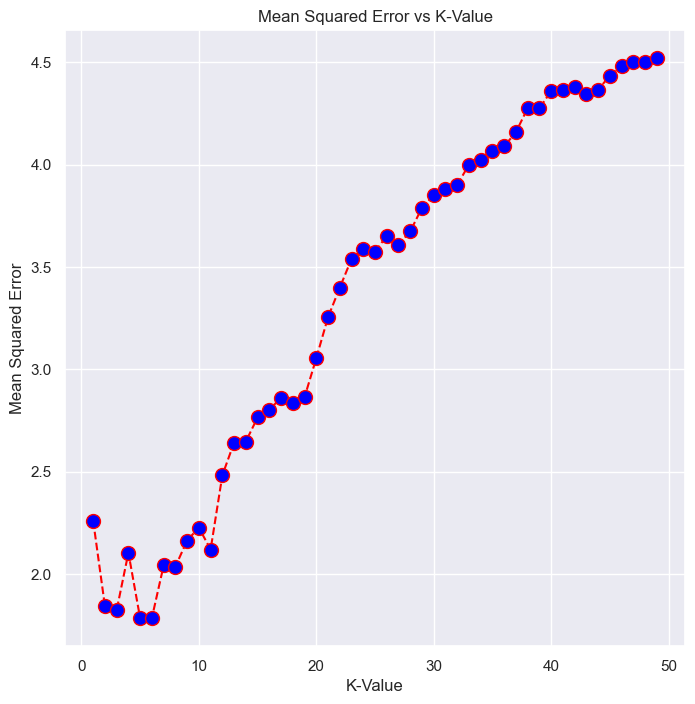

In [35]:
find_k(raw_x_train, raw_y_train, raw_x_val, raw_y_val)

- The error value is least in k = 5, proceeding with k = 5

In [36]:
# Building KNN regressor with k = 5
knn_raw = KNeighborsRegressor(n_neighbors = 5)
knn_raw.fit(raw_x_train, raw_y_train)
raw_y_pred_train_knn = knn_raw.predict(raw_x_train)
raw_y_pred_val_knn = knn_raw.predict(raw_x_val)

print("Accuracy Scores for KNN Regressor model on raw data")
raw_knn_rmse = mean_squared_error(raw_y_val, raw_y_pred_val_knn)
raw_train_knn_r2s = r2_score(raw_y_train, raw_y_pred_train_knn)
raw_val_knn_r2s = r2_score(raw_y_val, raw_y_pred_val_knn)
print("Mean Squared Error :", raw_knn_rmse)
print("R-squared Score (Train) :", raw_train_knn_r2s)
print("R-squared Score (Test) :", raw_val_knn_r2s)
print("**************" * 7)

Accuracy Scores for KNN Regressor model on raw data
Mean Squared Error : 1.7853199999999998
R-squared Score (Train) : 0.9355677641985846
R-squared Score (Test) : 0.9254917580693196
**************************************************************************************************


In [37]:
# Function for checking the best model out of the tested models for correlation treated dataset

def check_scores(mse_list, r2_train_list, r2_test_list, data):
    models_list = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Net Regression', "Decission Tree Regression",
                   'Random Forest Regression', 'Gradient Boosting Regression', 'LGBoost Regression', 'XGBoost Regression', 
                   'K Nearest Neighbour', 'SVR - Linear', 'SVR - Polynomial', 'SVR - RBF']

    accuracy = pd.DataFrame({'Method' : models_list, 'Mean Squared Error' : mse_list, 'R2Score(Training)' : r2_train_list,
                           'R2Score(Testing)' : r2_test_list})

    sns.lineplot(x = 'Method', y = 'Mean Squared Error', data = accuracy, label = 'MSE', color = 'green', linestyle = 'dashed', marker = 'o', markersize = 5, markerfacecolor = 'green')
    sns.lineplot(x = 'Method', y = 'R2Score(Training)', data = accuracy, label = 'R2Train', color = 'blue', linestyle = 'dashed', marker = 'o', markersize = 5, markerfacecolor = 'blue')
    sns.lineplot(x = 'Method', y = 'R2Score(Testing)', data = accuracy, label = 'R2Test', color = 'brown', linestyle = 'dashed', marker = 'o', markersize = 5, markerfacecolor = 'brown')
    plt.xticks(rotation = 90)
    plt.title("Accuracy on %s dataset" % data)
    plt.ylim(0.0, 3.0)
    plt.axhline(y = 0.7, linewidth = 1, color = 'red')
    plt.show()

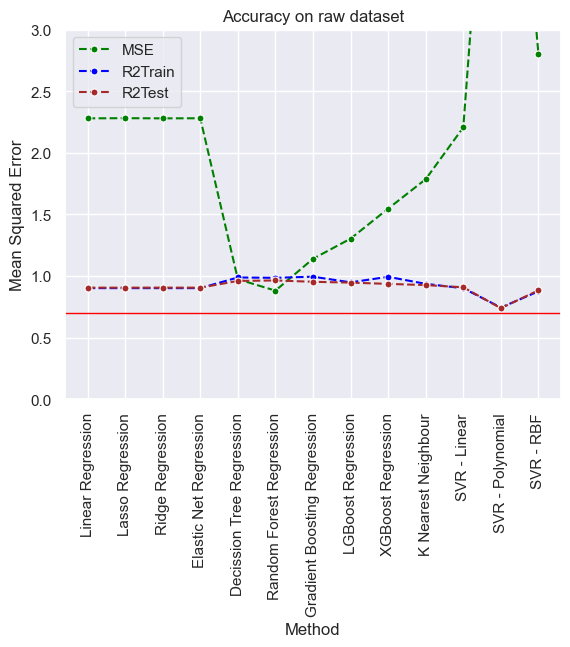

In [38]:
# Checking the accuracy of models on raw data

raw_mse_list = [raw_lr_rmse, raw_lar_rmse, raw_ridge_rmse, raw_enet_rmse, raw_dtree_rmse, raw_rf_rmse, raw_gb_rmse, raw_lgb_rmse,
                raw_xgb_rmse, raw_knn_rmse, raw_svr_linear_rmse, raw_svr_poly_rmse, raw_svr_rbf_rmse] 

raw_r2_train_list = [raw_train_lr_r2s, raw_train_lar_r2s, raw_train_ridge_r2s, raw_train_enet_r2s, raw_train_dtree_r2s,
                    raw_train_rf_r2s, raw_train_gb_r2s, raw_train_lgb_r2s, raw_train_xgb_r2s, raw_train_knn_r2s, 
                     raw_train_svr_linear_r2s, raw_train_svr_poly_r2s, raw_train_svr_rbf_r2s]

raw_r2_test_list = [raw_val_lr_r2s, raw_val_lar_r2s, raw_val_ridge_r2s, raw_val_enet_r2s, raw_val_dtree_r2s, raw_val_rf_r2s,
                   raw_val_gb_r2s, raw_val_lgb_r2s, raw_val_xgb_r2s, raw_val_knn_r2s, raw_val_svr_linear_r2s, raw_val_svr_poly_r2s, raw_val_svr_rbf_r2s]

check_scores(raw_mse_list, raw_r2_train_list, raw_r2_test_list, 'raw')

- Random Forest and Support Vector Model with a linear kernel exhibit robust performance on both training and testing datasets, balancing accuracy and generalization.
- While complex models like Gradient Boosting show high accuracy on training data, they may suffer from overfitting on the testing set, emphasizing the need for careful model selection.
- Ensemble methods, such as Random Forest, prove effective in mitigating overfitting observed in individual decision trees, providing improved generalization.
- The characteristics of the dataset, including the nature of relationships and noise, influence model performance. Simple models like Linear Regression and SVM with a linear kernel excel when dealing with linear relationships.
- LightGBM and XGBoost, gradient boosting implementations, demonstrate competitive accuracy with faster training times, making them efficient choices for large datasets.
- In conclusion, the choice of the regression model depends on the specific characteristics of the dataset, the trade-offs between bias and variance, and considerations for overfitting. Random Forest, SVM with a linear kernel, and ensemble methods like LightGBM and XGBoost emerge as strong contenders, each with its own set of advantages depending on the use case.

- Since there a only outliers in Newspaper category and they have less corelation with target, no treatment required.
- From the early visualisations we know that the data is in the same scale
- So deducing that no furthur model building required

#### Cross Validation of the top 3 models

In [39]:
# Cross validation on Random Forest with scaled raw data

train_rf_raw = cross_val_score(rf_raw, raw_x_train, raw_y_train, cv = 10, scoring = 'r2')
val_rf_raw = cross_val_score(rf_raw, raw_x_val, raw_y_val, cv = 10, scoring = 'r2')

print("Cross validation on Random Forest with raw data")
print("Train Mean Accuracy", train_rf_raw.mean())
print("**************")
print("Train Max Accuracy", train_rf_raw.max())
print("**************"*7)
print("Test Mean Accuracy", val_rf_raw.mean())
print("**************")
print("Test Max Accuracy", val_rf_raw.max())
print("**************"*7)

elapsed_time_rf_scld_raw = timeit.timeit()
print(f"Elapsed Time: {elapsed_time_rf_scld_raw} seconds")

Cross validation on Random Forest with raw data
Train Mean Accuracy 0.9122690290061335
**************
Train Max Accuracy 0.9765015290709014
**************************************************************************************************
Test Mean Accuracy 0.8088273766939214
**************
Test Max Accuracy 0.9366075944900674
**************************************************************************************************
Elapsed Time: 0.01490530010778457 seconds


In [40]:
# Cross validation on raw data using SVM with linear kernel

train_svm_linear_raw = cross_val_score(svr_linear_raw, raw_x_train, raw_y_train, cv = 10, scoring = 'r2')
val_svm_linear_raw = cross_val_score(svr_linear_raw, raw_x_val, raw_y_val, cv = 10, scoring = 'r2')

print("Cross validation on SVM with linear kernel on raw data")
print("Train Mean Accuracy", train_svm_linear_raw.mean())
print("**************")
print("Train Max Accuracy", train_svm_linear_raw.max())
print("**************"*7)
print("Test Mean Accuracy", val_svm_linear_raw.mean())
print("**************")
print("Test Max Accuracy", val_svm_linear_raw.max())
print("**************"*7)

elapsed_time_svm_linear_raw = timeit.timeit()
print(f"Elapsed Time: {elapsed_time_svm_linear_raw} seconds")

Cross validation on SVM with linear kernel on raw data
Train Mean Accuracy 0.8805539463052485
**************
Train Max Accuracy 0.9607546115933842
**************************************************************************************************
Test Mean Accuracy 0.8231019698311233
**************
Test Max Accuracy 0.9464638748687076
**************************************************************************************************
Elapsed Time: 0.02209199999924749 seconds


In [41]:
# Cross validation on LGBoost 

train_lgb_raw = cross_val_score(lgb_raw, raw_x_train, raw_y_train, cv = 10, scoring = 'r2')
val_lgb_raw = cross_val_score(lgb_raw, raw_x_val, raw_y_val, cv = 10, scoring = 'r2')

print("Cross validation using LGBoost on raw data")
print("Train Mean Accuracy", train_lgb_raw.mean())
print("**************")
print("Train Max Accuracy", train_lgb_raw.max())
print("**************"*7)
print("Test Mean Accuracy", val_lgb_raw.mean())
print("**************")
print("Test Max Accuracy", val_lgb_raw.max())
print("**************"*7)

elapsed_time_lgb_raw = timeit.timeit()
print(f"Elapsed Time: {elapsed_time_lgb_raw} seconds")

[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 135, number of used features: 3
[LightGBM] [Info] Start training from score 14.834815
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 135, number of used features: 3
[LightGBM] [Info] Start training from score 14.881482
[LightGBM] [Info] Total Bins 134
[LightGBM] [Info] Number of data points in the train set: 135, number of used features: 3
[LightGBM] [Info] Start training from score 14.872593
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 135, number of used features: 3
[LightGBM] [Info] Start training from score 14.957037
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 135, number of used features: 3
[LightGBM] [Info] Start training from score 14.877037
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 135, number of used feat

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Total Bins 48
[LightGBM] [Info] Number of data points in the train set: 45, number of used features: 3
[LightGBM] [Info] Start training from score 16.366667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

- Considering the results, the Random Forest model appears to be the best among the three. 
- It achieves high mean accuracy on both training and test sets, indicating robust performance and generalization. 
- While LGBoost shows good performance on the training set, the negative mean accuracy on the test set raises concerns, suggesting potential issues that need further investigation. 
- SVM with a linear kernel also performs well, but Random Forest stands out with a balanced combination of accuracy and generalization.

#### Saving the model for deployment and genearting the output file

In [42]:
# Saving model for deployment

final_model = rf_raw
filename = '04_Sales_Predictions.sav'
pickle.dump(final_model, open(filename, 'wb'))

In [43]:
out_df = sales_df

In [44]:
# Splitting dependent and independent variable

x_final = out_df.drop(['Sales'], axis = 1)
y_final = out_df['Sales']

In [45]:
# Predicting the Rating using Random Forest model that was chosen as final model

y_pred = final_model.predict(x_final)

In [46]:
final_result = pd.DataFrame(y_pred)
final_result = final_result.rename(columns = {0 : "Predicted_Sales"})
final_result

,Predicted_Sales
0,21.914317
1,10.538109
2,10.375141
3,16.596545
4,17.074889
...,...
195,7.995284
196,13.085124
197,15.922846
198,25.113205


In [47]:
# Preparing the final data fram for output

final_result1 = pd.concat([sales_df, pd.DataFrame(final_result)], axis = 1)
final_result1.head(5)

,TV,Radio,Newspaper,Sales,Predicted_Sales
0,230.1,37.8,69.2,22.1,21.914317
1,44.5,39.3,45.1,10.4,10.538109
2,17.2,45.9,69.3,12.0,10.375141
3,151.5,41.3,58.5,16.5,16.596545
4,180.8,10.8,58.4,17.9,17.074889


In [48]:
final_result1.to_csv("04_Predicted_Sales.csv")